# Predicting heart disease using machine learning

This notebook looks into using ML and data science libraries to build a ML model capable of predicting whether or not someone has heart disease based on their medical attributes.

We're going to take the following approach:
1. Problem definition
2. Data
3. Features
4. Modelling


## 1. Problem Definition

Can we predict whether or not they have heart disease?

## 2. Data

The original data came from the Cleavland data. https://www.kaggle.com/datasets/redwankarimsony/heart-disease-data


## 3. Features

**Create data dictionary**
1. `id` (Unique id for each patient)
2. `age` (Age of the patient in years)
3. `origin` (place of study)
4. `sex` (Male/Female)
5. `cp` chest pain type 
        * typical angina (consists of (1) Substernal chest pain or discomfort that is (2) Provoked by exertion or emotional stress and (3) relieved by rest or nitroglycerine (or both))
        * atypical angina (applies when 2 out of 3 criteria of classic angina are present)
        * non-anginal 
        * asymptomatic (If ≤ 1 of the criteria of classic angina is present, symptoms are classified as non-specific)
6. `trestbps` resting blood pressure (in mm Hg on admission to the hospital)
7. `chol` (serum cholesterol in mg/dl)
8. `fbs` (if fasting blood sugar > 120 mg/dl)
9. `restecg` (resting electrocardiographic results)
        * normal stt
        * abnormality
        * lv hypertrophy
10. `thalach`: maximum heart rate achieved
11. `exang`: exercise-induced angina (True/ False)
12. `oldpeak`: ST depression induced by exercise relative to rest
13. `slope`: the slope of the peak exercise ST segment
14. `ca`: number of major vessels (0-3) colored by fluoroscopy
15. `thal`: 
        * normal
        * fixed defect
        * reversible defect
16. `num`: the predicted attribute, target
        * 0=no heart disease
        * 1,2,3,4 = stages of heart disease

## Preparing the tools 

We're gooing to use pandas, Matplotlib and Numpy for data analysis and manipulation

In [1]:
# Regular EDA (exploratory data analysis) and plotting libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Models from Scikit-Learn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.svm import SVC

# Model Evaluations
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

## Load data

In [2]:
df = pd.read_csv(r'C:\Users\ASUS\studing\heart_disease_project\heart_disease_uci.csv', encoding='windows-1251')
df

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,916,54,Female,VA Long Beach,asymptomatic,127.0,333.0,True,st-t abnormality,154.0,False,0.0,NaN,NaN,NaN,1
916,917,62,Male,VA Long Beach,typical angina,NaN,139.0,False,st-t abnormality,NaN,NaN,NaN,NaN,NaN,NaN,0
917,918,55,Male,VA Long Beach,asymptomatic,122.0,223.0,True,st-t abnormality,100.0,False,0.0,NaN,NaN,fixed defect,2
918,919,58,Male,VA Long Beach,asymptomatic,NaN,385.0,True,lv hypertrophy,NaN,NaN,NaN,NaN,NaN,NaN,0


## Data Exploration

In [54]:
df.dtypes

id            int64
age           int64
sex          object
dataset      object
cp           object
trestbps    float64
chol        float64
fbs          object
restecg      object
thalch      float64
exang        object
oldpeak     float64
slope        object
ca          float64
thal         object
num           int64
dtype: object

In [56]:
df.describe()

,id,age,trestbps,chol,thalch,oldpeak,ca,num
count,920.000000,920.000000,861.000000,890.000000,865.000000,858.000000,309.000000,920.000000
mean,460.500000,53.510870,132.132404,199.130337,137.545665,0.878788,0.676375,0.995652
std,265.725422,9.424685,19.066070,110.780810,25.926276,1.091226,0.935653,1.142693
min,1.000000,28.000000,0.000000,0.000000,60.000000,-2.600000,0.000000,0.000000
25%,230.750000,47.000000,120.000000,175.000000,120.000000,0.000000,0.000000,0.000000
50%,460.500000,54.000000,130.000000,223.000000,140.000000,0.500000,0.000000,1.000000
75%,690.250000,60.000000,140.000000,268.000000,157.000000,1.500000,1.000000,2.000000
max,920.000000,77.000000,200.000000,603.000000,202.000000,6.200000,3.000000,4.000000


In [58]:
df.isna().sum()

id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64

We're try to predict whether or not a patient has heart disease, so we combine stages of heart disease into `has heart disease`

In [3]:
df['num'] = np.where(df['num']>0, 1, 0)
df = df.rename(columns={'num':'target'})

### Visualize the distribution of categorical variables 

In [67]:
df['target'].value_counts()

1    509
0    411
Name: target, dtype: int64

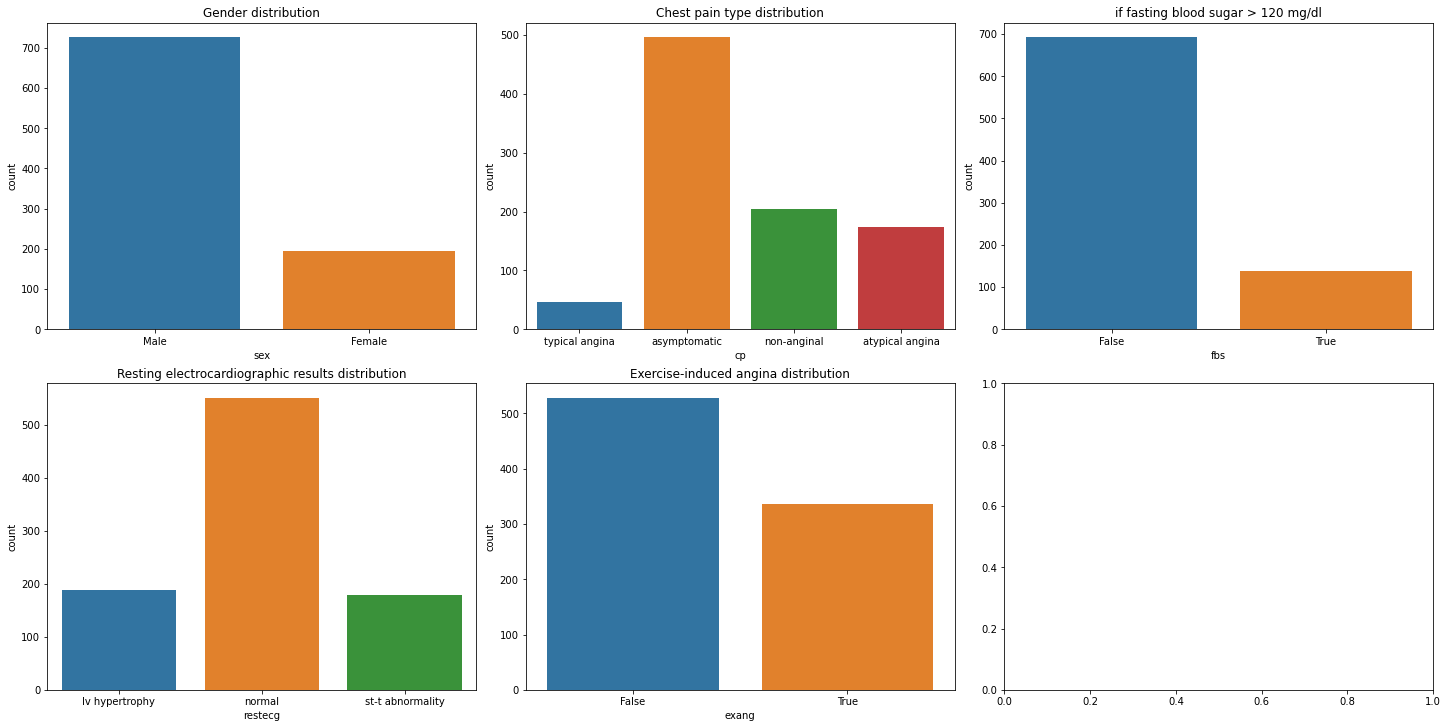

In [68]:
# Visualize the distribution of categorical variables
fig, ax = plt.subplots(nrows=2,
                      ncols=3,
                      figsize=(20,10),
                      constrained_layout = True)

sns.countplot(x = df['sex'],
              ax=ax[0,0]);
ax[0,0].set(title ='Gender distribution');

sns.countplot(x = df['cp'],
              ax=ax[0,1]);
ax[0,1].set(title ='Chest pain type distribution');

sns.countplot(x = df['fbs'],
              ax=ax[0,2]);
ax[0,2].set(title ='if fasting blood sugar > 120 mg/dl');

sns.countplot(x = df['restecg'],
              ax=ax[1,0]);
ax[1,0].set(title ='Resting electrocardiographic results distribution');

sns.countplot(x = df['exang'],
              ax=ax[1,1]);
ax[1,1].set(title ='Exercise-induced angina distribution');


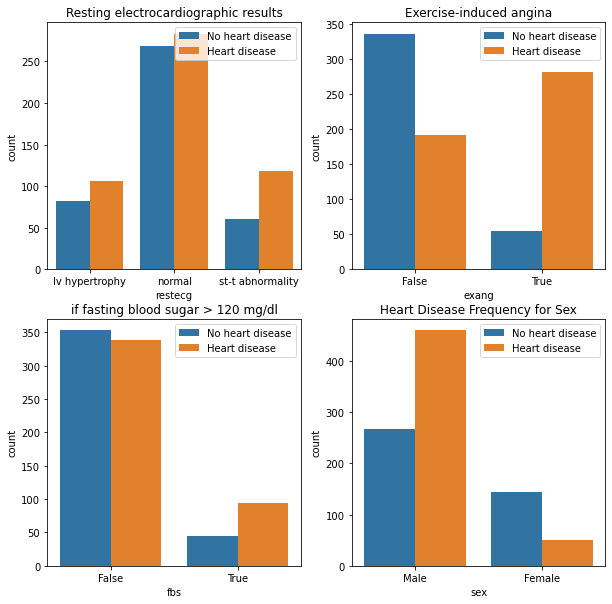

In [65]:
# Visualize the distribution of categorical variables depending of target
fig, ax = plt.subplots(nrows=2,
                      ncols=2,
                      figsize=(10,10))


sns.countplot(x = df['restecg'],
              hue = df['target'],
              ax=ax[0,0]);
ax[0,0].set(title ='Resting electrocardiographic results');

sns.countplot(x = df['exang'],
             hue = df['target'],
             ax=ax[0,1]);
ax[0,1].set(title ='Exercise-induced angina');

sns.countplot(x = df['fbs'],
             hue = df['target'],
             ax=ax[1,0]);
ax[1,0].set(title ='if fasting blood sugar > 120 mg/dl');

sns.countplot(x = df['sex'],
             hue = df['target'],
             ax=ax[1,1]);
ax[1,1].set(title ='Heart Disease Frequency for Sex');

ax[0,0].legend(['No heart disease', 'Heart disease']);
ax[0,1].legend(['No heart disease', 'Heart disease']);
ax[1,0].legend(['No heart disease', 'Heart disease']);
ax[1,1].legend(['No heart disease', 'Heart disease']);

### Visualize the distribution of numerical variables 

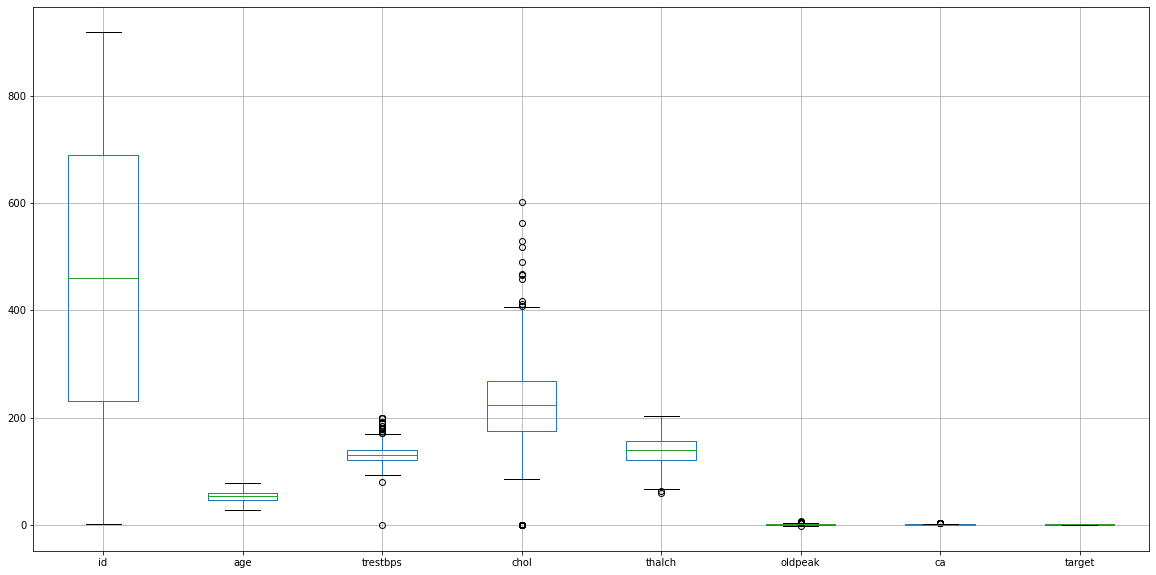

In [69]:
df.boxplot(figsize=(20,10));

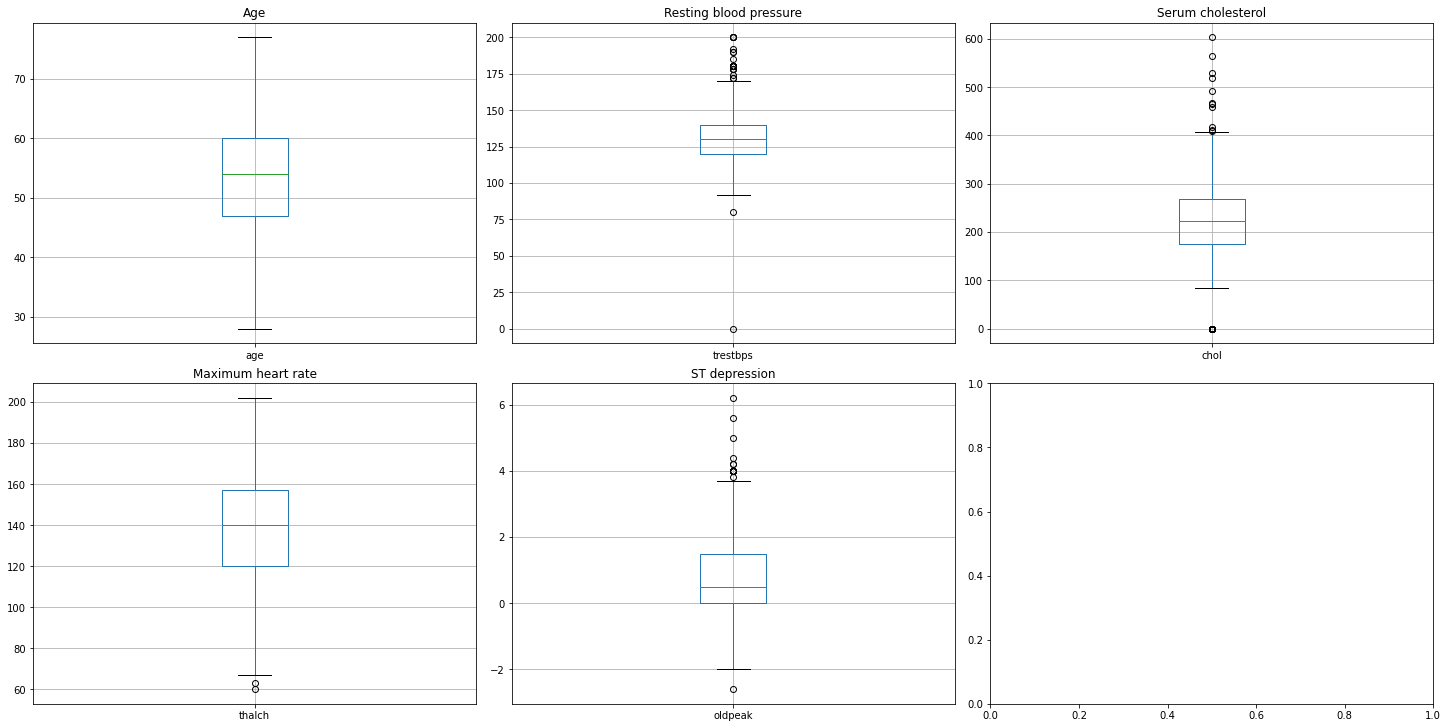

In [70]:
fig, ax = plt.subplots(nrows=2,
                      ncols=3,
                      figsize=(20,10),
                      constrained_layout = True)

df.boxplot(column='age', ax=ax[0,0]);
ax[0,0].set(title ='Age');

df.boxplot(column='trestbps', ax=ax[0,1]);
ax[0,1].set(title ='Resting blood pressure');

df.boxplot(column='chol', ax=ax[0,2]);
ax[0,2].set(title ='Serum cholesterol');

df.boxplot(column='thalch', ax=ax[1,0]);
ax[1,0].set(title ='Maximum heart rate');

df.boxplot(column='oldpeak', ax=ax[1,1]);
ax[1,1].set(title ='ST depression');


In [72]:
df.groupby(['target'], as_index=False).mean()

,target,id,age,trestbps,chol,thalch,oldpeak,ca
0,0,355.257908,50.547445,129.913043,227.905612,148.800512,0.418205,0.278788
1,1,545.479371,55.903733,133.978723,176.479920,128.261603,1.262607,1.131944


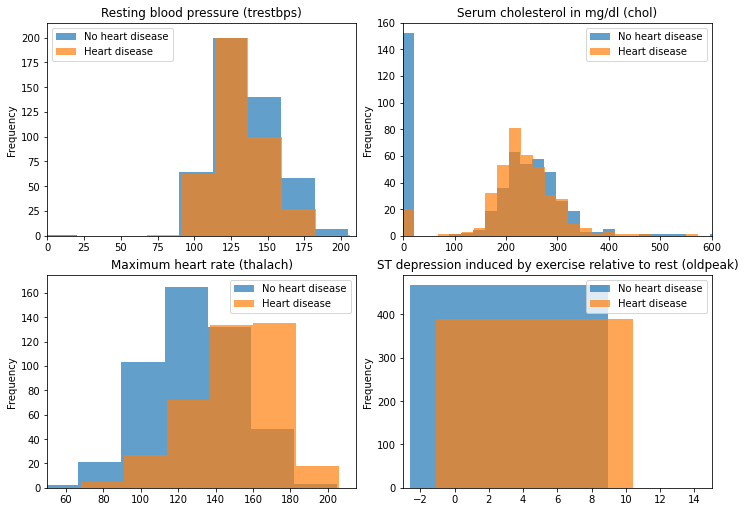

In [103]:
# Visualize the distribution of categorical variables depending of target
fig, ax = plt.subplots(nrows=2,
                       ncols=2,
                       figsize=(10,7),
                       constrained_layout = True)

# Resting blood pressure ('trestbps')
df.query('target != 0').plot.hist(bins=40, column=['trestbps'], ax=ax[0,0], alpha=0.7)
df.query('target == 0').plot.hist(bins=40, column=['trestbps'], ax=ax[0,0], alpha=0.7)
ax[0,0].set(title ='Resting blood pressure (trestbps)',
         xlim=[0,210],
         ylim=[0,215]);
ax[0,0].legend(['No heart disease', 'Heart disease']);

# Serum cholesterol ('chol')
df.query('target != 0').plot.hist(bins=40, column=['chol'], ax=ax[0,1], alpha=0.7)
df.query('target == 0').plot.hist(bins=40, column=['chol'], ax=ax[0,1], alpha=0.7)
ax[0,1].set(title ='Serum cholesterol in mg/dl (chol)',
         xlim=[0,600],
         ylim=[0,160]);
ax[0,1].legend(['No heart disease', 'Heart disease']);

# Maximum heart rate ('thalach')
df.query('target != 0').plot.hist(bins=40, column=['thalch'], ax=ax[1,0], alpha=0.7)
df.query('target == 0').plot.hist(bins=40, column=['thalch'], ax=ax[1,0], alpha=0.7)
ax[1,0].set(title ='Maximum heart rate (thalach)',
         xlim=[50,215],
         ylim=[0,175]);
ax[1,0].legend(['No heart disease', 'Heart disease']);

#ST depression induced by exercise relative to rest ('oldpeak')
df.query('target != 0').plot.hist(bins=80, column=['oldpeak'], ax=ax[1,1], alpha=0.7)
df.query('target == 0').plot.hist(bins=80, column=['oldpeak'], ax=ax[1,1], alpha=0.7)
ax[1,1].set(title ='ST depression induced by exercise relative to rest (oldpeak)',
         xlim=[-3,15]);
ax[1,1].legend(['No heart disease', 'Heart disease']);

`chol` and `trastbps` have values equal 0, most likely this is a measurement error, so we'll delete 0 values or replaced with an mean value

In [108]:
# DataFrame with mean of numerical data depend of heart disease
mean_num_param = pd.DataFrame(data = df.query('target != 0').agg({'thalch':'mean', 'oldpeak':'mean'}),
                              columns= ['hd'],
                              index = ['thalch', 'oldpeak'])
no_hd = pd.DataFrame(data = df.query('target == 0').agg({'thalch':'mean', 'oldpeak':'mean'}),
                              columns= ['no hd'],
                              index = ['thalch', 'oldpeak'])
both = pd.DataFrame(data = df.agg({'thalch':'mean', 'oldpeak':'mean'}),
                              columns= ['both'],
                              index = ['thalch', 'oldpeak']) 
mean_num_param['no_hd'] = no_hd
mean_num_param['both'] = both
mean_num_param

,hd,no_hd,both
thalch,128.261603,148.800512,137.545665
oldpeak,1.262607,0.418205,0.878788


## Data Cleaning

In [4]:
# Drop useless data 
df = df.drop(['id', 'dataset'], axis=1)

# Drop data witn large count of missing data
df = df.drop(['slope', 'ca', 'thal'], axis=1)
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,target
0,63,Male,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,0
1,67,Male,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,1
2,67,Male,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,1
3,37,Male,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,0
4,41,Female,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,0
...,...,...,...,...,...,...,...,...,...,...,...
915,54,Female,asymptomatic,127.0,333.0,True,st-t abnormality,154.0,False,0.0,1
916,62,Male,typical angina,NaN,139.0,False,st-t abnormality,NaN,NaN,NaN,0
917,55,Male,asymptomatic,122.0,223.0,True,st-t abnormality,100.0,False,0.0,1
918,58,Male,asymptomatic,NaN,385.0,True,lv hypertrophy,NaN,NaN,NaN,0


In [5]:
# Resting blood pressure (trestbps)
mean_trestbps = df.loc[df['trestbps']!=0,'trestbps'].mean()
df.fillna(value={'trestbps':mean_trestbps}, inplace=True)
df.loc[df['trestbps']==0, 'trestbps'] = mean_trestbps

# Serum cholesterol (chol)
mean_chol = df.loc[df['chol']!=0,'chol'].mean()
df.fillna(value={'chol':mean_chol}, inplace=True)
df.loc[df['chol']==0, 'chol'] = mean_chol

# Maximum heart rate (thalch)
mean_thalch_no_hd = df.loc[(df['target']==0),'thalch'].mean()
mean_thalch_hd = df.loc[(df['target']!=0),'thalch'].mean()

df.loc[(df['target']==0) & (df['thalch'].isna()),'thalch'] = mean_thalch_no_hd
df.loc[(df['target']!=0) & (df['thalch'].isna()),'thalch'] = mean_thalch_hd

# ST depression induced by exercise relative to rest (oldpeak)
mean_oldpeak_no_hd = df.loc[(df['target']==0),'oldpeak'].mean()
mean_oldpeak_hd = df.loc[(df['target']!=0),'oldpeak'].mean()

df.loc[(df['target']==0) & (df['oldpeak'].isna()),'oldpeak'] = mean_oldpeak_no_hd
df.loc[(df['target']!=0) & (df['oldpeak'].isna()),'oldpeak'] = mean_oldpeak_hd

# Fasting blood sugar > 120 mg/dl (True/ False) (fbs)
df.fillna(value={'fbs':False}, inplace=True)

# Exercise-induced angina (True/ False) (exang)
df.fillna(value={'exang':False}, inplace=True)

# Drop remaining rows with missing values
df.dropna(inplace=True)

In [6]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
target      0
dtype: int64

`cp` chest pain type 

        * typical angina (consists of (1) Substernal chest pain or discomfort that is (2) Provoked by exertion or emotional stress and (3) relieved by rest or nitroglycerine (or both))
        * atypical angina (applies when 2 out of 3 criteria of classic angina are present)
        * non-anginal 
        * asymptomatic (If ≤ 1 of the criteria of classic angina is present, symptoms are classified as non-specific)

`restecg` (resting electrocardiographic results)

        * normal stt
        * abnormality
        * lv hypertrophy

In [117]:
df['restecg'].value_counts()

normal              551
lv hypertrophy      188
st-t abnormality    179
Name: restecg, dtype: int64

In [118]:
df['cp'].value_counts()

asymptomatic       495
non-anginal        204
atypical angina    174
typical angina      45
Name: cp, dtype: int64

In [7]:
# for identifying simply the presence of disease, we will take binary classification
df['sex'] = df['sex'].map({'Female':0, 'Male': 1})
df['fbs'] = df['fbs'].map({True:1, False: 0})
df['exang'] = df['exang'].map({True:1, False: 0})
df['restecg'] = df['restecg'].map({'normal':0, 'lv hypertrophy': 1, 'st-t abnormality': 2})

df = pd.get_dummies(df, columns=['cp'])


### Display correlation matrix and heatmap

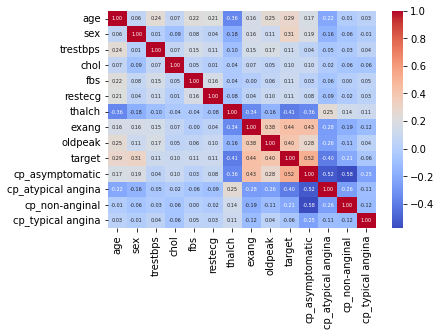

In [124]:
corr = df.corr()
sns.heatmap(corr, annot=True, fmt= '.2f',annot_kws={'size': 5}, cmap= 'coolwarm')
plt.show()

In [8]:
df


,age,sex,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,target,cp_asymptomatic,cp_atypical angina,cp_non-anginal,cp_typical angina
0,63,1,145.000000,233.0,1,1,150.000000,0,2.300000,0,0,0,0,1
1,67,1,160.000000,286.0,0,1,108.000000,1,1.500000,1,1,0,0,0
2,67,1,120.000000,229.0,0,1,129.000000,1,2.600000,1,1,0,0,0
3,37,1,130.000000,250.0,0,0,187.000000,0,3.500000,0,0,0,1,0
4,41,0,130.000000,204.0,0,1,172.000000,0,1.400000,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,54,0,127.000000,333.0,1,2,154.000000,0,0.000000,1,1,0,0,0
916,62,1,132.286047,139.0,0,2,148.800512,0,0.418205,0,0,0,0,1
917,55,1,122.000000,223.0,1,2,100.000000,0,0.000000,1,1,0,0,0
918,58,1,132.286047,385.0,1,1,148.800512,0,0.418205,0,1,0,0,0


## 4. Modelling

In [9]:
# Split into X and y
np.random.seed(42)
X = df.drop('target', axis=1)
y = df['target']


# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

We're going to try different ML models:

    1. Logistic Regression
    2. K-Nearest Neighbours Classifier
    3. Random Forest Classifier
    4. LinearSVC
    5. SVC

In [10]:
np.random.seed(42)

clf_models = {'SVC_linear' : LinearSVC(),
              'KNeighborsClassifier': KNeighborsClassifier(),
              'SVC_rbf': SVC(),
              'RandomForestClassifier': RandomForestClassifier(),
              'LogisticRegression': LogisticRegression()}

clf_results = {}
for model_name, clf in clf_models.items():
    
    print(f'Fitting {model_name}...')
    clf.fit(X_train, y_train)
       
    print(f'Scoring {model_name}...')
    clf_results[model_name] = clf.score(X_test, y_test)
            
clf_results

Fitting SVC_linear...
Scoring SVC_linear...
Fitting KNeighborsClassifier...
Scoring KNeighborsClassifier...
Fitting SVC_rbf...
Scoring SVC_rbf...
Fitting RandomForestClassifier...


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Scoring RandomForestClassifier...
Fitting LogisticRegression...
Scoring LogisticRegression...


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'SVC_linear': 0.6847826086956522,
 'KNeighborsClassifier': 0.6467391304347826,
 'SVC_rbf': 0.6684782608695652,
 'RandomForestClassifier': 0.7989130434782609,
 'LogisticRegression': 0.7989130434782609}

Let's look at the following:
* Hyperparameter tuning
* Feature importance
* Confusion matrix
* Cross-validation
* Precision
* Recall
* F1 score
* Classification report
* ROC curve
* Area under the curve (AUC)

### Hyperparameter tuning

In [11]:
# KNN tuning

clf_knn = KNeighborsClassifier()

neighbors = range(1,21)

knn_score = []
for i in neighbors:
    clf_knn.set_params(n_neighbors=i)
    clf_knn.fit(X_train, y_train)
    knn_score.append(clf_knn.score(X_test, y_test))
    

Maximal model score 66.85%


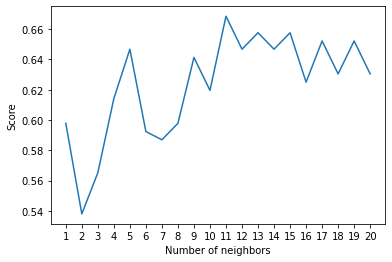

In [12]:
plt.plot(neighbors, knn_score)
plt.xticks(np.arange(1, 21, 1))
plt.xlabel('Number of neighbors')
plt.ylabel('Score')

print(f'Maximal model score {max(knn_score)*100:.2f}%')

In [13]:
# LogisticRegression tuning with RandomizedSearchCV
np.random.seed(42)
grid_log_reg = {'C': np.logspace(-4, 4, 20),
       'solver': ['liblinear', 'lbfgs']}

clf_log_reg = LogisticRegression()

rs_log_reg = RandomizedSearchCV(estimator=clf_log_reg,
                            param_distributions=grid_log_reg,
                            n_iter=10,
                            cv=5,
                            verbose=2)
rs_log_reg.fit(X_train, y_train)
rs_log_reg.best_params_


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END ..................C=0.615848211066026, solver=lbfgs; total time=   0.0s
[CV] END ..................C=0.615848211066026, solver=lbfgs; total time=   0.0s
[CV] END ..................C=0.615848211066026, solver=lbfgs; total time=   0.0s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

[CV] END ..................C=0.615848211066026, solver=lbfgs; total time=   0.0s
[CV] END ..................C=0.615848211066026, solver=lbfgs; total time=   0.0s
[CV] END ............C=0.23357214690901212, solver=liblinear; total time=   0.0s
[CV] END ............C=0.23357214690901212, solver=liblinear; total time=   0.0s
[CV] END ............C=0.23357214690901212, solver=liblinear; total time=   0.0s
[CV] END ............C=0.23357214690901212, solver=liblinear; total time=   0.0s
[CV] END ............C=0.23357214690901212, solver=liblinear; total time=   0.0s
[CV] END ................C=0.08858667904100823, solver=lbfgs; total time=   0.0s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

[CV] END ................C=0.08858667904100823, solver=lbfgs; total time=   0.0s
[CV] END ................C=0.08858667904100823, solver=lbfgs; total time=   0.0s
[CV] END ................C=0.08858667904100823, solver=lbfgs; total time=   0.0s
[CV] END ................C=0.08858667904100823, solver=lbfgs; total time=   0.0s
[CV] END .............C=29.763514416313132, solver=liblinear; total time=   0.0s
[CV] END .............C=29.763514416313132, solver=liblinear; total time=   0.0s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

[CV] END .............C=29.763514416313132, solver=liblinear; total time=   0.0s
[CV] END .............C=29.763514416313132, solver=liblinear; total time=   0.0s
[CV] END .............C=29.763514416313132, solver=liblinear; total time=   0.0s
[CV] END ..........C=0.0006951927961775605, solver=liblinear; total time=   0.0s
[CV] END ..........C=0.0006951927961775605, solver=liblinear; total time=   0.0s
[CV] END ..........C=0.0006951927961775605, solver=liblinear; total time=   0.0s
[CV] END ..........C=0.0006951927961775605, solver=liblinear; total time=   0.0s
[CV] END ..........C=0.0006951927961775605, solver=liblinear; total time=   0.0s
[CV] END ............C=0.03359818286283781, solver=liblinear; total time=   0.0s
[CV] END ............C=0.03359818286283781, solver=liblinear; total time=   0.0s
[CV] END ............C=0.03359818286283781, solver=liblinear; total time=   0.0s
[CV] END ............C=0.03359818286283781, solver=liblinear; total time=   0.0s
[CV] END ............C=0.033

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

[CV] END ..................C=3792.690190732246, solver=lbfgs; total time=   0.0s
[CV] END ..................C=3792.690190732246, solver=lbfgs; total time=   0.0s
[CV] END ..................C=3792.690190732246, solver=lbfgs; total time=   0.0s
[CV] END ..................C=3792.690190732246, solver=lbfgs; total time=   0.0s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

[CV] END ..................C=3792.690190732246, solver=lbfgs; total time=   0.0s
[CV] END .................C=29.763514416313132, solver=lbfgs; total time=   0.0s
[CV] END .................C=29.763514416313132, solver=lbfgs; total time=   0.0s
[CV] END .................C=29.763514416313132, solver=lbfgs; total time=   0.0s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

[CV] END .................C=29.763514416313132, solver=lbfgs; total time=   0.0s
[CV] END .................C=29.763514416313132, solver=lbfgs; total time=   0.0s
[CV] END ............................C=10000.0, solver=lbfgs; total time=   0.0s
[CV] END ............................C=10000.0, solver=lbfgs; total time=   0.0s
[CV] END ............................C=10000.0, solver=lbfgs; total time=   0.0s
[CV] END ............................C=10000.0, solver=lbfgs; total time=   0.0s
[CV] END ............................C=10000.0, solver=lbfgs; total time=   0.0s
[CV] END ..........C=0.0018329807108324356, solver=liblinear; total time=   0.0s
[CV] END ..........C=0.0018329807108324356, solver=liblinear; total time=   0.0s
[CV] END ..........C=0.0018329807108324356, solver=liblinear; total time=   0.0s
[CV] END ..........C=0.0018329807108324356, solver=liblinear; total time=   0.0s
[CV] END ..........C=0.0018329807108324356, solver=liblinear; total time=   0.0s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

{'solver': 'lbfgs', 'C': 0.08858667904100823}

In [14]:
rs_log_reg.score(X_test, y_test)

0.7989130434782609

In [15]:
# SVC tuning with RandomizedSearchCV
np.random.seed(42)

grid_SVC = {'C': np.logspace(-4, 4, 20),
            'kernel':['linear', 'poly', 'rbf'],
            'degree':[3, 5]}

clf_SVC = SVC()

rs_SVC = RandomizedSearchCV(estimator=clf_SVC,
                            param_distributions=grid_SVC,
                            n_iter=10,
                            cv=5,
                            verbose=2)
rs_SVC.fit(X_train, y_train)
rs_SVC.best_params_

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END ........C=0.08858667904100823, degree=3, kernel=rbf; total time=   0.0s
[CV] END ........C=0.08858667904100823, degree=3, kernel=rbf; total time=   0.0s
[CV] END ........C=0.08858667904100823, degree=3, kernel=rbf; total time=   0.0s
[CV] END ........C=0.08858667904100823, degree=3, kernel=rbf; total time=   0.0s
[CV] END ........C=0.08858667904100823, degree=3, kernel=rbf; total time=   0.0s
[CV] END ........C=0.08858667904100823, degree=5, kernel=rbf; total time=   0.0s
[CV] END ........C=0.08858667904100823, degree=5, kernel=rbf; total time=   0.0s
[CV] END ........C=0.08858667904100823, degree=5, kernel=rbf; total time=   0.0s
[CV] END ........C=0.08858667904100823, degree=5, kernel=rbf; total time=   0.0s
[CV] END ........C=0.08858667904100823, degree=5, kernel=rbf; total time=   0.0s
[CV] END ....................C=0.0001, degree=5, kernel=poly; total time=   0.0s
[CV] END ....................C=0.0001, degree=5,

{'kernel': 'rbf', 'degree': 5, 'C': 1438.44988828766}

In [16]:
rs_SVC.score(X_test, y_test)

0.8043478260869565

In [17]:
# LinearSVC tuning with RandomizedSearchCV
np.random.seed(42)

grid_SVC_linear = {'C': np.logspace(-4, 4, 20)}

clf_SVC_linear = LinearSVC()

rs_SVC_linear = RandomizedSearchCV(estimator=clf_SVC_linear,
                            param_distributions=grid_SVC_linear,
                            n_iter=10,
                            cv=5,
                            verbose=2)
rs_SVC_linear.fit(X_train, y_train)
rs_SVC_linear.best_params_

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END ...........................................C=0.0001; total time=   0.0s
[CV] END ...........................................C=0.0001; total time=   0.0s
[CV] END ...........................................C=0.0001; total time=   0.0s
[CV] END ...........................................C=0.0001; total time=   0.0s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV] END ...........................................C=0.0001; total time=   0.0s
[CV] END .................................C=1438.44988828766; total time=   0.0s
[CV] END .................................C=1438.44988828766; total time=   0.0s
[CV] END .................................C=1438.44988828766; total time=   0.0s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV] END .................................C=1438.44988828766; total time=   0.0s
[CV] END .................................C=1438.44988828766; total time=   0.0s
[CV] END .................................C=206.913808111479; total time=   0.0s
[CV] END .................................C=206.913808111479; total time=   0.0s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV] END .................................C=206.913808111479; total time=   0.0s
[CV] END .................................C=206.913808111479; total time=   0.0s
[CV] END .................................C=206.913808111479; total time=   0.0s
[CV] END ...........................C=0.00026366508987303583; total time=   0.0s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV] END ...........................C=0.00026366508987303583; total time=   0.0s
[CV] END ...........................C=0.00026366508987303583; total time=   0.0s
[CV] END ...........................C=0.00026366508987303583; total time=   0.0s
[CV] END ...........................C=0.00026366508987303583; total time=   0.0s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV] END ..............................C=0.23357214690901212; total time=   0.0s
[CV] END ..............................C=0.23357214690901212; total time=   0.0s
[CV] END ..............................C=0.23357214690901212; total time=   0.0s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV] END ..............................C=0.23357214690901212; total time=   0.0s
[CV] END ..............................C=0.23357214690901212; total time=   0.0s
[CV] END .............................C=0.012742749857031334; total time=   0.0s
[CV] END .............................C=0.012742749857031334; total time=   0.0s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV] END .............................C=0.012742749857031334; total time=   0.0s
[CV] END .............................C=0.012742749857031334; total time=   0.0s
[CV] END .............................C=0.012742749857031334; total time=   0.0s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV] END ................................C=4.281332398719396; total time=   0.0s
[CV] END ................................C=4.281332398719396; total time=   0.0s
[CV] END ................................C=4.281332398719396; total time=   0.0s
[CV] END ................................C=4.281332398719396; total time=   0.0s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV] END ................................C=4.281332398719396; total time=   0.0s
[CV] END ............................C=0.0018329807108324356; total time=   0.0s
[CV] END ............................C=0.0018329807108324356; total time=   0.0s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV] END ............................C=0.0018329807108324356; total time=   0.0s
[CV] END ............................C=0.0018329807108324356; total time=   0.0s
[CV] END ............................C=0.0018329807108324356; total time=   0.0s
[CV] END ................................C=3792.690190732246; total time=   0.0s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV] END ................................C=3792.690190732246; total time=   0.0s
[CV] END ................................C=3792.690190732246; total time=   0.0s
[CV] END ................................C=3792.690190732246; total time=   0.0s
[CV] END ................................C=3792.690190732246; total time=   0.0s
[CV] END ................................C=545.5594781168514; total time=   0.0s
[CV] END ................................C=545.5594781168514; total time=   0.0s
[CV] END ................................C=545.5594781168514; total time=   0.0s
[CV] END ................................C=545.5594781168514; total time=   0.0s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV] END ................................C=545.5594781168514; total time=   0.0s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


{'C': 0.0018329807108324356}

In [18]:
rs_SVC_linear.score(X_test, y_test)

0.782608695652174

In [222]:
# RandomForestClassifier tuning with RandomizedSearchCV

np.random.seed(42)

rf_grid = {'n_estimators': np.arange(300, 1000, 50),
       'max_depth': [None, 5, 10, 20],
       'max_features': [None, 'sqrt'],
       'min_samples_split': np.arange(2, 20, 2),
       'min_samples_leaf':  np.arange(1, 20, 2)}

clf_rf = RandomForestClassifier(n_jobs=1)

rs_clf_rf = RandomizedSearchCV(estimator=clf_rf,
                            param_distributions=rf_grid,
                            n_iter=10,
                            cv=5,
                            verbose=2)
rs_clf_rf.fit(X_train, y_train)
rs_clf_rf.best_params_

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=15, min_samples_split=14, n_estimators=500; total time=   1.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=15, min_samples_split=14, n_estimators=500; total time=   1.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=15, min_samples_split=14, n_estimators=500; total time=   1.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=15, min_samples_split=14, n_estimators=500; total time=   1.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=15, min_samples_split=14, n_estimators=500; total time=   1.3s
[CV] END max_depth=None, max_features=None, min_samples_leaf=13, min_samples_split=16, n_estimators=600; total time=   2.0s
[CV] END max_depth=None, max_features=None, min_samples_leaf=13, min_samples_split=16, n_estimators=600; total time=   2.3s
[CV] END max_depth=None, max_features=None, min_samples_leaf=13, min_samples_spli

{'n_estimators': 500,
 'min_samples_split': 14,
 'min_samples_leaf': 15,
 'max_features': 'sqrt',
 'max_depth': 10}

In [223]:
rs_clf_rf.score(X_test, y_test)

0.7880434782608695

## Hyperparameter Tuning with GridSearchCV
Since our SVC model provides the best scores so far, we'll try and improve them again using GridSearchCV

In [31]:
# SVC tuning with GridSearchCV
np.random.seed(42)

grid_SVC = {'C': np.logspace(-4, 4, 20),
            'kernel':['poly', 'rbf'],
            'degree': [5]}

clf_SVC = SVC()

gs_SVC = GridSearchCV(estimator=clf_SVC,
                            param_grid=grid_SVC,
                            cv=5,
                            verbose=2)
gs_SVC.fit(X_train, y_train)
gs_SVC.best_params_

Fitting 5 folds for each of 40 candidates, totalling 200 fits
[CV] END ....................C=0.0001, degree=5, kernel=poly; total time=   0.0s
[CV] END ....................C=0.0001, degree=5, kernel=poly; total time=   0.0s
[CV] END ....................C=0.0001, degree=5, kernel=poly; total time=   0.0s
[CV] END ....................C=0.0001, degree=5, kernel=poly; total time=   0.0s
[CV] END ....................C=0.0001, degree=5, kernel=poly; total time=   0.0s
[CV] END .....................C=0.0001, degree=5, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.0001, degree=5, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.0001, degree=5, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.0001, degree=5, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.0001, degree=5, kernel=rbf; total time=   0.0s
[CV] END ....C=0.00026366508987303583, degree=5, kernel=poly; total time=   0.0s
[CV] END ....C=0.00026366508987303583, degree=5

[CV] END ..........C=1.623776739188721, degree=5, kernel=rbf; total time=   0.0s
[CV] END ..........C=1.623776739188721, degree=5, kernel=rbf; total time=   0.0s
[CV] END ..........C=1.623776739188721, degree=5, kernel=rbf; total time=   0.0s
[CV] END ..........C=1.623776739188721, degree=5, kernel=rbf; total time=   0.0s
[CV] END ..........C=1.623776739188721, degree=5, kernel=rbf; total time=   0.0s
[CV] END .........C=4.281332398719396, degree=5, kernel=poly; total time=   0.0s
[CV] END .........C=4.281332398719396, degree=5, kernel=poly; total time=   0.0s
[CV] END .........C=4.281332398719396, degree=5, kernel=poly; total time=   0.0s
[CV] END .........C=4.281332398719396, degree=5, kernel=poly; total time=   0.0s
[CV] END .........C=4.281332398719396, degree=5, kernel=poly; total time=   0.0s
[CV] END ..........C=4.281332398719396, degree=5, kernel=rbf; total time=   0.0s
[CV] END ..........C=4.281332398719396, degree=5, kernel=rbf; total time=   0.0s
[CV] END ..........C=4.28133

{'C': 1438.44988828766, 'degree': 5, 'kernel': 'rbf'}

In [58]:
gs_SVC.score(X_test, y_test)  

0.8206521739130435

## Evaluting our tuned ML classifier, beyond accuracy

* ROC curve and AUC score
* Confusion matrix
* Precision
* Recall
* F1 score
* Classification report
 

In [54]:
np.random.seed(42)

clf = SVC(C = 1438.44988828766,
          kernel = 'rbf',
          degree=5,
          gamma=0.00001)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.8206521739130435

In [59]:
# Make predictions with tuned model
y_preds = clf.predict(X_test)

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


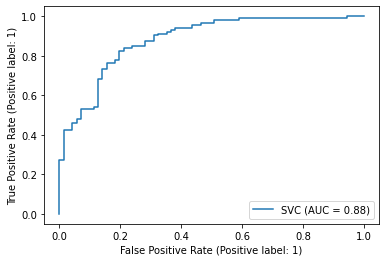

In [60]:
# Plot ROC curve and calculate AUC metric
plot_roc_curve(clf, X_test, y_test);

<AxesSubplot:>

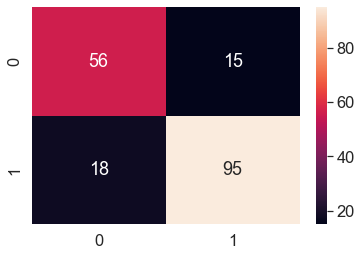

In [61]:
# Confusion matrix
sns.set(font_scale=1.5)
conf_mat=confusion_matrix(y_test, y_preds)
sns.heatmap(conf_mat, annot=True)

In [62]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.76      0.79      0.77        71
           1       0.86      0.84      0.85       113

    accuracy                           0.82       184
   macro avg       0.81      0.81      0.81       184
weighted avg       0.82      0.82      0.82       184



### Calculate evaluation metrics using cross-validation

We're going to calculate precision, recall, f1-score of our model using cross-validation 

In [63]:
cv_acc = cross_val_score(clf, X, y, cv=5, scoring=None)
cv_recall = cross_val_score(clf, X, y, cv=5, scoring='recall')
cv_precision = cross_val_score(clf, X, y, cv=5, scoring='precision')
cv_f1 = cross_val_score(clf, X, y, cv=5, scoring='f1')

print(f'Accuracy: {np.mean(cv_acc)*100:.2f}%')
print(f'Precision: {np.mean(cv_precision):.2f}')
print(f'Recall: {np.mean(cv_recall):.2f}')
print(f'F1 score: {np.mean(cv_f1):.2f}')

Accuracy: 79.96%
Precision: 0.82
Recall: 0.83
F1 score: 0.82
